In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import fetch_california_housing
import seaborn as sns

# 한글 폰트 설정 (선택사항)
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False



# 1. 단순 선형 회귀 실습

X 형태: (30, 1), y 형태: (30,)
X 데이터 샘플: [1 2 3 4 5]
y 데이터 샘플: [ 8.49014246  8.5852071  12.94306561 17.56908957 14.29753988]


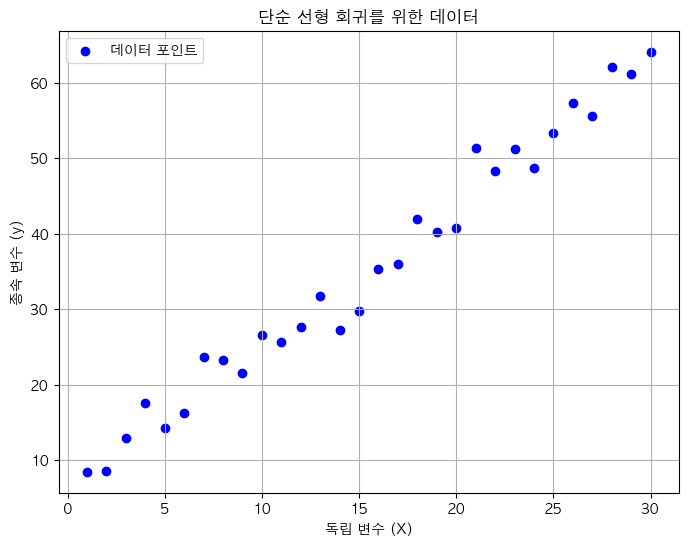

In [11]:

# 샘플 데이터 생성
np.random.seed(42)

X = np.array(range(1, 31)).reshape(-1, 1)  # 1부터 30까지의 값을 2D 배열로 변환
y = 2 * X.flatten() + 5 + np.random.normal(0, 3, 30)  # y = 2x + 5 + 오차

# 데이터 확인
print(f"X 형태: {X.shape}, y 형태: {y.shape}")
print("X 데이터 샘플:", X.flatten()[:5])
print("y 데이터 샘플:", y[:5])

# 데이터 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='데이터 포인트')
plt.title('단순 선형 회귀를 위한 데이터')
plt.xlabel('독립 변수 (X)')
plt.ylabel('종속 변수 (y)')
plt.legend()
plt.grid(True)
plt.show()



가중치 (w): 1.89
편향 (b): 6.07
MSE: 6.21
R-squared: 0.98


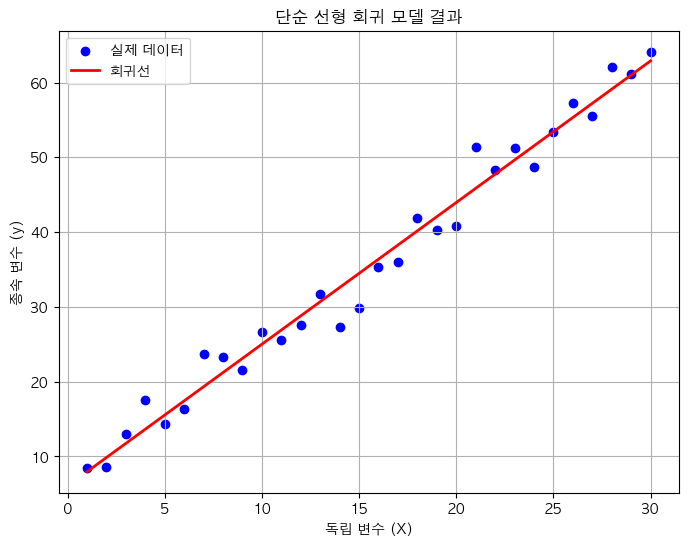

In [12]:

# 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 학습된 파라미터 확인
print(f"가중치 (w): {model.coef_[0]:.2f}")
print(f"편향 (b): {model.intercept_:.2f}")

# 예측
y_pred = model.predict(X)

# 모델 평가
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='실제 데이터')
plt.plot(X, y_pred, color='red', linewidth=2, label='회귀선')
plt.title('단순 선형 회귀 모델 결과')
plt.xlabel('독립 변수 (X)')
plt.ylabel('종속 변수 (y)')
plt.legend()
plt.grid(True)
plt.savefig('단순선형회귀_결과.png')
plt.show()

# 2. 다중 선형 회귀 실습

데이터셋 정보:
데이터 크기: (20640, 8)
특성 이름: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
타겟 변수: 주택 가격 중앙값 (단위: 100,000 달러)

데이터 미리보기:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

타겟과의 상관관계:
PRICE         1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: PRICE, dtype: float64


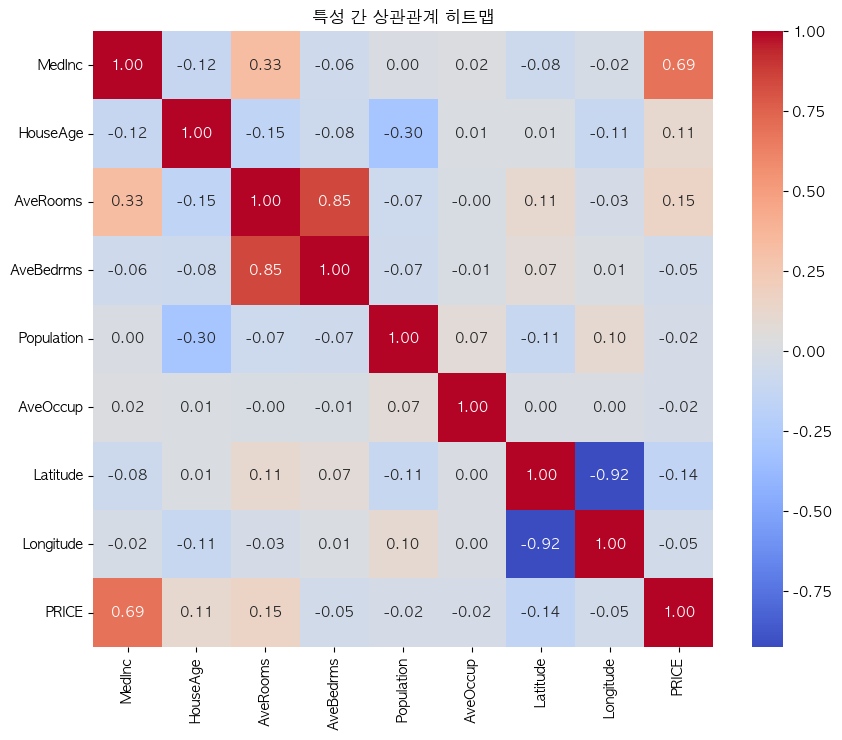

In [13]:
# 캘리포니아 주택 데이터셋 로드
housing = fetch_california_housing()
X_multi = pd.DataFrame(housing.data, columns=housing.feature_names)
# housing.target이 price
y_multi = housing.target

print("데이터셋 정보:")
print(f"데이터 크기: {X_multi.shape}")
print(f"특성 이름: {housing.feature_names}")
print(f"타겟 변수: 주택 가격 중앙값 (단위: 100,000 달러)")

# 데이터 확인
print("\n데이터 미리보기:")
print(X_multi.head())

# 특성과 타겟 간의 상관관계 확인
X_multi_with_target = X_multi.copy()
X_multi_with_target['PRICE'] = y_multi
correlation = X_multi_with_target.corr()['PRICE'].sort_values(ascending=False)
print("\n타겟과의 상관관계:")
print(correlation)

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(X_multi_with_target.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('특성 간 상관관계 히트맵')
plt.savefig('상관관계_히트맵.png')
plt.show()



학습 데이터 크기: (16512, 8)
테스트 데이터 크기: (4128, 8)

MSE: 0.5559
RMSE: 0.7456
R-squared: 0.5758

회귀 계수 (각 특성별 영향력):
  MedInc: 0.4487
  HouseAge: 0.0097
  AveRooms: -0.1233
  AveBedrms: 0.7831
  Population: -0.0000
  AveOccup: -0.0035
  Latitude: -0.4198
  Longitude: -0.4337
절편: -37.0233


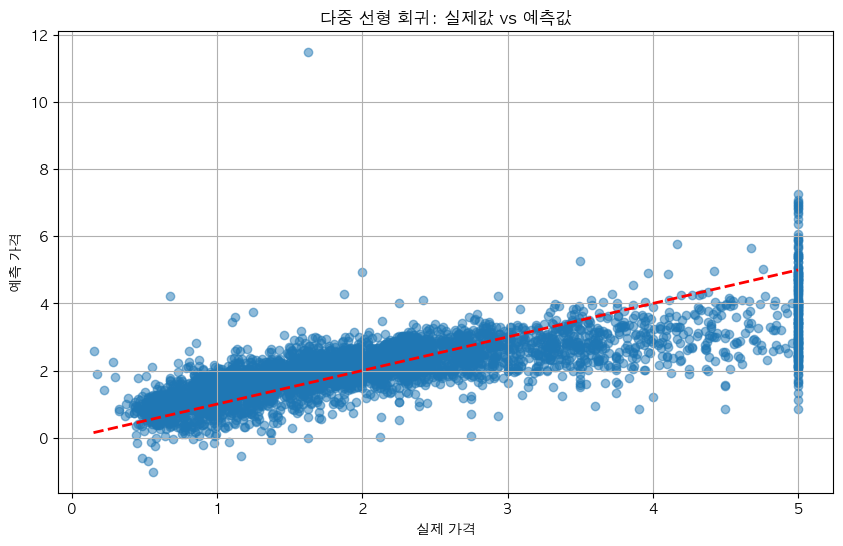

In [15]:

# 학습/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)
print(f"\n학습 데이터 크기: {X_train.shape}")
print(f"테스트 데이터 크기: {X_test.shape}")

# 모델 생성 및 학습
multi_model = LinearRegression()
multi_model.fit(X_train, y_train)

# 테스트 데이터 예측
y_pred_multi = multi_model.predict(X_test)

# 모델 평가
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print(f"\nMSE: {mse_multi:.4f}")
print(f"RMSE: {rmse_multi:.4f}")
print(f"R-squared: {r2_multi:.4f}")

# 학습된 회귀 계수 확인
print("\n회귀 계수 (각 특성별 영향력):")
for feature, coef in zip(X_multi.columns, multi_model.coef_):
    print(f"  {feature}: {coef:.4f}")
print(f"절편: {multi_model.intercept_:.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_multi, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('실제 가격')
plt.ylabel('예측 가격')
plt.title('다중 선형 회귀: 실제값 vs 예측값')
plt.grid(True)
plt.savefig('다중선형회귀_예측결과.png')
plt.show()


# 3. 규제가 적용된 선형 회귀 모델

일반 선형 회귀 R-squared: 0.5758
Ridge 회귀 R-squared: 0.5759
Lasso 회귀 R-squared: 0.5318

회귀 계수 비교:
      Feature  LinearRegression     Ridge     Lasso
0      MedInc          0.448675  0.448511  0.392693
1    HouseAge          0.009724  0.009726  0.015081
2    AveRooms         -0.123323 -0.123014 -0.000000
3   AveBedrms          0.783145  0.781417  0.000000
4  Population         -0.000002 -0.000002  0.000016
5    AveOccup         -0.003526 -0.003526 -0.003149
6    Latitude         -0.419792 -0.419787 -0.114291
7   Longitude         -0.433708 -0.433681 -0.099308


<Figure size 1200x800 with 0 Axes>

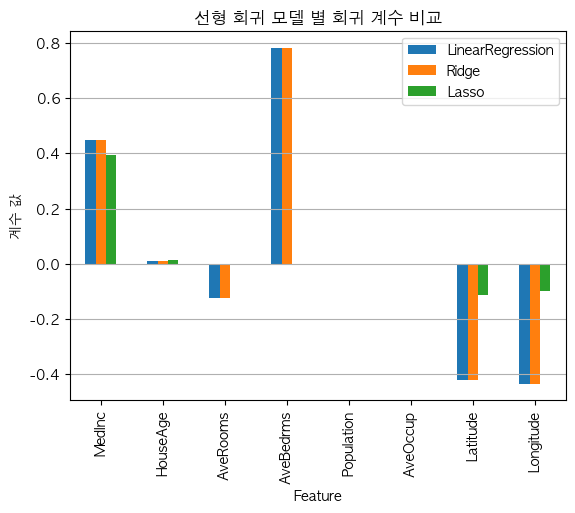

In [16]:

# Ridge 회귀 (L2 규제)
ridge_model = Ridge(alpha=1.0)  # alpha는 규제 강도
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Lasso 회귀 (L1 규제)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"일반 선형 회귀 R-squared: {r2_multi:.4f}")
print(f"Ridge 회귀 R-squared: {r2_ridge:.4f}")
print(f"Lasso 회귀 R-squared: {r2_lasso:.4f}")

# 회귀 계수 비교
coefs = pd.DataFrame()
coefs['Feature'] = X_multi.columns
coefs['LinearRegression'] = multi_model.coef_
coefs['Ridge'] = ridge_model.coef_
coefs['Lasso'] = lasso_model.coef_

print("\n회귀 계수 비교:")
print(coefs)

# 회귀 계수 시각화
plt.figure(figsize=(12, 8))
coefs.set_index('Feature').plot(kind='bar')
plt.grid(True, axis='y')
plt.title('선형 회귀 모델 별 회귀 계수 비교')
plt.ylabel('계수 값')
plt.savefig('규제모델_회귀계수비교.png')
plt.show()


다음 실습 과제를 수행해보세요:

1. 단순 선형 회귀 모델에서 다른 기울기와 절편을 가진 데이터를 생성하고 모델을 학습해보세요.
2. 다중 선형 회귀에서 특성 선택(feature selection)을 통해 가장 중요한 특성들만 사용하여 모델 성능 변화를 확인해보세요.
3. Ridge와 Lasso 모델에서 alpha 값을 변경하면서 모델의 성능과 회귀 계수의 변화를 관찰해보세요.
4. 학습 데이터와 테스트 데이터 비율을 변경하면서 모델 성능 변화를 확인해보세요.
5. 모델 가정(선형성, 독립성, 등분산성, 정규성)을 검증하기 위한 잔차 분석을 수행해보세요.
